In [78]:
#库的引入
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [79]:
def loaddata(filename):
   data = pd.read_csv(filename, header=None)
   x = np.array(data.iloc[:, 0:2])
   y = np.array(data.iloc[:, 2]) 
   x=np.insert(x,2,values=np.ones(len(x)),axis=1)
   x = np.mat(x)  
   y = np.mat(y).T
   return x, y

In [80]:
#封装sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z));

In [81]:
#梯度下降过程
def log_reg(x, y, l=0.005,maxiters=200000):
    w = np.mat(np.zeros((3,1)))
    m=len(x)
    i=0
    for i in range(maxiters):#设置最大迭代次数
        h=sigmoid(x*w)
        grad = (1/m)*x.T*(h - y)#求平均梯度
        w = w - l*grad
        #J=1/m*((np.log(1+np.exp(x*w))-np.multiply(y,x*w)).sum()),这是交叉熵损失，用于看算法执行过程中交叉熵的变化
        #J=np.array(-1/m*((y.T)*np.log(h)+((1-y).T)*np.log(h)))[0]
    J=1/m*((np.log(1+np.exp(x*w))-np.multiply(y,x*w)).sum())
    plt.show()
    print(grad,J)#输出一下最后的梯度和cost
    return w,h

In [82]:
#载入数据集
x, y = loaddata(r'C:\vscode_m\summer_holiday1\machine_learning\week3\ex2\first_data\11_train.csv')
w, hw = log_reg(x, y)#获取目标参数
print(w)
#print(hw)
w1 = w[0,0]
w2 = w[1,0]
w0 = w[2,0]

[[6.37287099]
 [6.21758783]
 [0.10406865]] 0.2423821278702597
[[  0.22020221]
 [  0.19683195]
 [-27.67406323]]


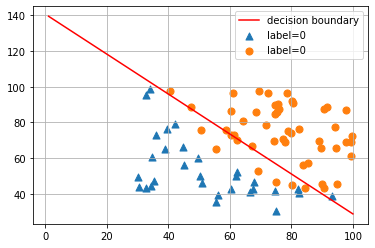

In [83]:
#画decision boundary
plotx1 = np.arange(1, 100, 0.01)
plotx2 = -w0/w2 - w1/w2*plotx1
plt.plot(plotx1, plotx2, c='r', label='decision boundary')
plt.scatter(x[:, 0][y == 0].A, x[:, 1][y == 0].A, marker='^', s=50, label='label=0')
plt.scatter(x[:, 0][y == 1].A, x[:, 1][y == 1].A, s=50, label='label=0')
plt.grid()
plt.legend()
plt.show()

balance_point: 0.92


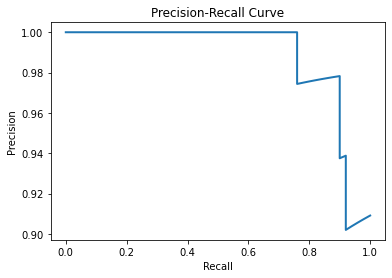

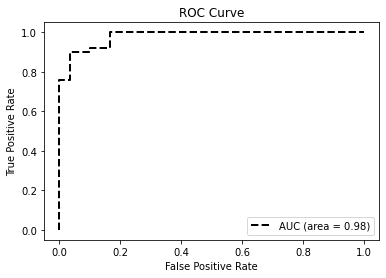

In [84]:
#画pr曲线
y_true = np.array(y)
y_scores = np.array(hw)
precision, recall, thresholds = precision_recall_curve(y_true,  y_scores)#sklearn库函数

balance_point = 0.
for i in range(len(precision)):
    if precision[i] == recall[i]:
        balance_point = float(precision[i])
plt.plot(recall, precision,lw=2)
print('balance_point:',balance_point)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
fpr, tpr, thersholds = roc_curve(y_true, y_scores)#sklearn库函数
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', label='AUC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()